In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.chdir("C:\\Users\\Ganesh\\RandPython-Part3")
from sklearn.datasets import make_classification, make_blobs

In [2]:

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','zn','indus','chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']
X.shape


(506, 13)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
#X_train=X_train.reshape(-1,1)
#X_test=X_test.reshape(-1,1)

In [22]:
X_train.shape

(379, 13)

In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','zn','indus','chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X.as_matrix(), y.as_matrix())
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

NameError: name 'plot_sfs' is not defined

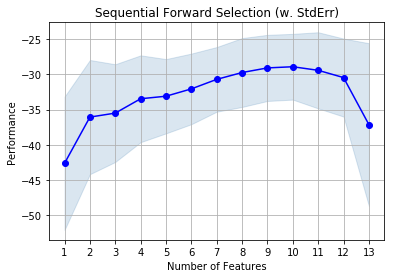

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','zn','indus','chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=(1,13), 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X.as_matrix(), y.as_matrix())
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


In [21]:
pd.DataFrame.from_dict(sfs.get_metric_dict(confidence_interval=0.90)).T

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-42.6185,19.0465,"[-23.5582499971, -41.8215743748, -73.993608929...","(12,)",18.9042,9.45212
2,-36.0651,16.3184,"[-18.002498199, -40.1507894517, -56.5286659068...","(10, 12)",16.1965,8.09826
3,-35.4992,13.9619,"[-17.2329292677, -44.4178648308, -51.633177846...","(10, 12, 7)",13.8576,6.92881
4,-33.463,12.4081,"[-20.6415333292, -37.3247852146, -47.479302977...","(12, 10, 4, 7)",12.3154,6.15772
5,-33.1038,10.6156,"[-20.2872309863, -34.6367078466, -45.931870352...","(4, 7, 8, 10, 12)",10.5363,5.26816
6,-32.0638,10.0933,"[-19.4463829372, -33.460638577, -42.726257249,...","(4, 7, 8, 9, 10, 12)",10.0179,5.00896
7,-30.7133,9.23881,"[-19.4425181917, -31.1742902259, -40.531266671...","(1, 4, 7, 8, 9, 10, 12)",9.16981,4.58491
8,-29.7432,9.84468,"[-19.445277268, -30.0641187173, -40.2561247122...","(1, 4, 7, 8, 9, 10, 11, 12)",9.77116,4.88558
9,-29.0878,9.45027,"[-19.3545569877, -30.094768669, -39.7506036377...","(0, 1, 4, 7, 8, 9, 10, 11, 12)",9.37969,4.68985
10,-28.9225,9.39697,"[-18.562171585, -29.968504938, -39.9586835965,...","(0, 1, 4, 6, 7, 8, 9, 10, 11, 12)",9.3268,4.6634


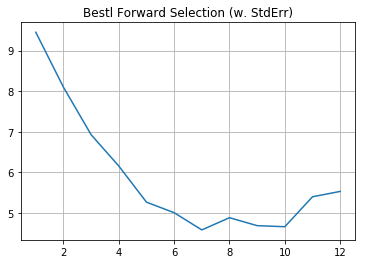

In [25]:
a=sfs.get_metric_dict()

m=[]
for i in np.arange(1,13):
    m.append(np.mean(a[i]['std_err']))

l=np.arange(1,13)
plt.plot(l,m)
plt.title('Bestl Forward Selection (w. StdErr)')
plt.grid()
plt.show()

linreg

best combination (ACC: -32.370): (0, 1, 2, 3, 5, 7, 10, 12)

('all subsets:\n', {1: {'avg_score': -42.618472789410582, 'feature_idx': (12,), 'cv_scores': array([-23.55825   , -41.82157437, -73.99360893, -50.50118016, -23.21775049])}, 2: {'avg_score': -36.0651299642116, 'feature_idx': (10, 12), 'cv_scores': array([-18.0024982 , -40.15078945, -56.52866591, -49.08360802, -16.56008824])}, 3: {'avg_score': -34.100081490306835, 'feature_idx': (10, 12, 5), 'cv_scores': array([ -9.43012884, -25.95849554, -36.18418817, -71.75796657, -27.16962833])}, 4: {'avg_score': -33.76808458181474, 'feature_idx': (10, 3, 12, 5), 'cv_scores': array([ -8.86076529, -28.65021763, -35.72463539, -69.69223644, -25.91256816])}, 5: {'avg_score': -33.639224148324885, 'feature_idx': (0, 10, 3, 12, 5), 'cv_scores': array([ -8.90807629, -28.06846791, -35.82746302, -70.42063882, -24.97147471])}, 6: {'avg_score': -33.627647762327811, 'feature_idx': (0, 3, 5, 7, 10, 12), 'cv_scores': array([ -9.54948594, -30.97246029, -32.

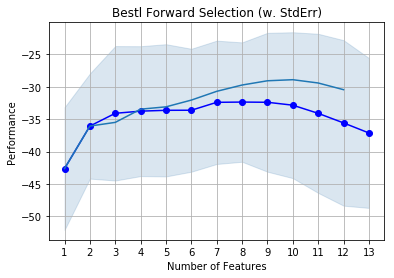

In [11]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','zn','indus','chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']
lr = LinearRegression()

sfs1 = SFS(lr, 
          k_features=(3,13), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X, y)

print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict(), kind='std_err');
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','zn','indus','chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y=df['medv']
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X.as_matrix(), y.as_matrix())
#fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
#fig = plot_sfs(sfs.get_metric_dict(), kind='cv_scores')
a=sfs.get_metric_dict()

m=[]
for i in np.arange(1,13):
    m.append(np.mean(a[i]['cv_scores']))

    
   
l=np.arange(1,13)
plt.plot(l,m)
plt.title('Bestl Forward Selection (w. StdErr)')
plt.grid()
plt.show()


In [109]:
a=sfs.get_metric_dict()
np.mean(a[13]['cv_scores'])

-37.131807467697335

In [78]:
?SFS
